<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

#### Figure:

A figure is the outermost container for a plot. It represents the entire window or page in which the plot is drawn.
Each figure can contain one or more subplots (axes).
It includes properties such as size, background color, and resolution.

#### Axis:

An axis is a plotting area within a figure. It is where data is actually plotted.
A figure can contain multiple axes arranged in rows and columns, forming a grid of subplots.
An axis has properties such as x-axis and y-axis limits, ticks, labels, and titles.


# 2 Comparing the two ‘dialects’

### pyplot Interface

In [11]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)


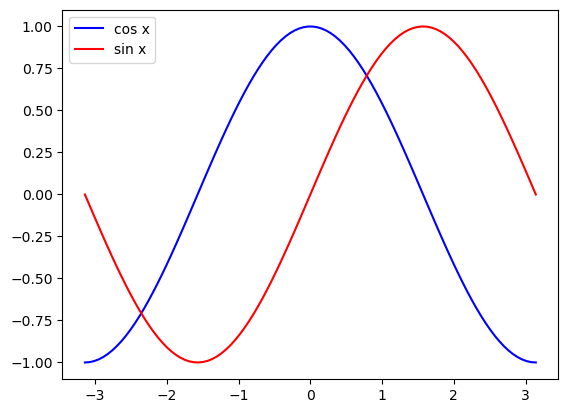

In [14]:
plt.plot(x,cos_x, label='cos x',
         color='blue')
plt.plot(x,sin_x, label='sin x',
         color='red')
plt.legend()

### OO Interface

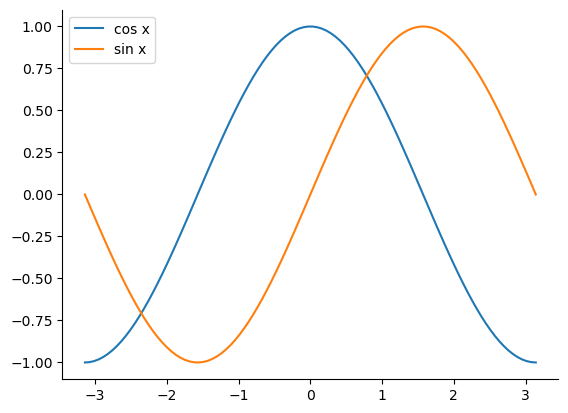

In [26]:
# Object-oriented interface

fig, ax = plt.subplots(nrows=1, ncols=1) #you have control over the axis
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
ax.spines[["right","top"]].set_visible(False) #E.G removing the top and right borders

<class 'matplotlib.figure.Figure'>


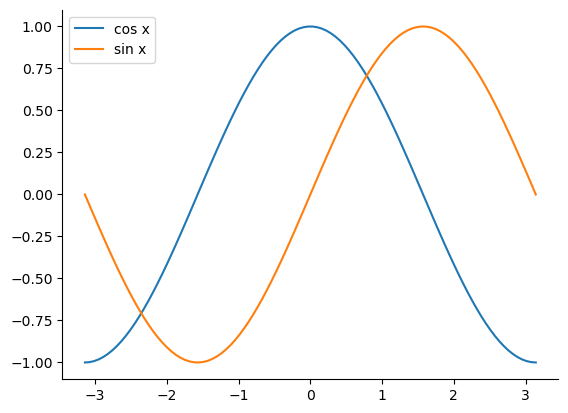

In [27]:
print(type(fig))
fig



# 3 What is OO ax, really?

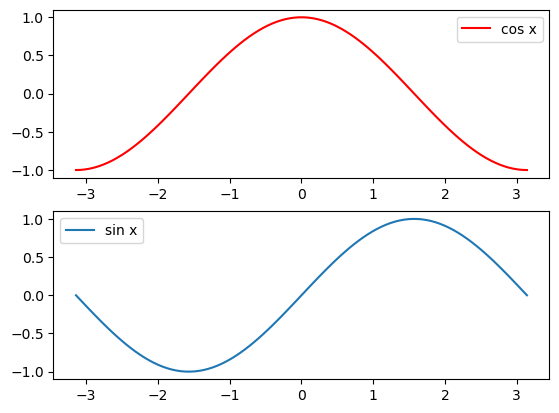

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1) #2 rows of plots

ax[0].plot(x, cos_x, label='cos x', c="r") #ax behaving a NumPy array (can be indexed)
ax[1].plot(x, sin_x, label='sin x') #ax behaving a NumPy array (can be indexed)

ax[0].legend()
ax[1].legend()

In [30]:
type(ax) #ax is a NumPy array!

numpy.ndarray

In [41]:
ax.shape #??

(3,)

In [34]:
type(ax[0]) #the index of ax is a Matplotlib axis.

matplotlib.axes._axes.Axes

# 4 A complete OO example

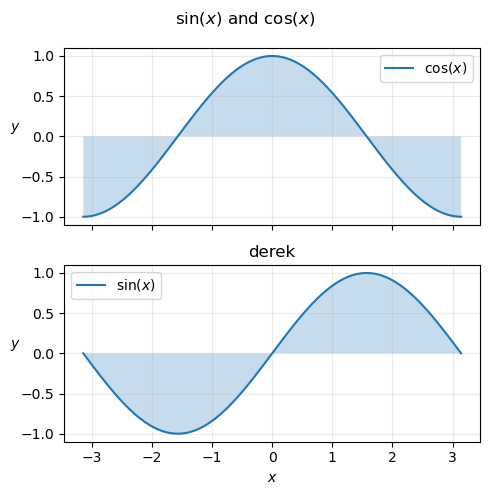

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1,  #2 rows of axes, 1 figure of size 5 by 5
                       figsize=(5, 5),
                       sharex=True) #shares the x axis!

ax[0].plot(x, cos_x, label=r'$\cos(x)$') #$\xxx$ makes the legend look more professional (back in Jupiter markdown)
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

# x: This represents the x-coordinates of the points.
# 0: This represents the y-coordinate of the lower boundary of the filled area. In this case, it's the x-axis (y=0).
# cos_x: This represents the y-coordinates of the upper boundary of the filled area. It appears to be a variable holding the cosine values of x.
#ax[0].fill_between(x, 0, cos_x, alpha=.25) is filling the area between the x-axis and the curve defined by cos_x on the first subplot with 25% transparency.

for a in ax: #for item in ax (2 items at the moment, ax[0] and ax[1])
    a.legend() #create legend for each axis
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)  #rotation literally means the angle it rotates

ax[1].set_xlabel('$x$')
ax[1].set_title('derek')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout() #keep both graphs concise

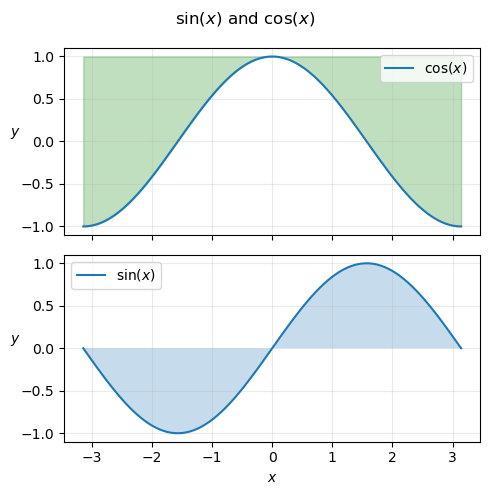

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1,  #2 rows of axes, 1 figure of size 5 by 5
                       figsize=(5, 5),
                       sharex=True) #shares the x axis!

ax[0].plot(x, cos_x, label=r'$\cos(x)$') #$\xxx$ makes the legend look more professional (back in Jupiter markdown)
ax[0].fill_between(x, 1, cos_x, alpha=.25, color = "g")
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

# 5 Multiple rows and columns

### Using ax

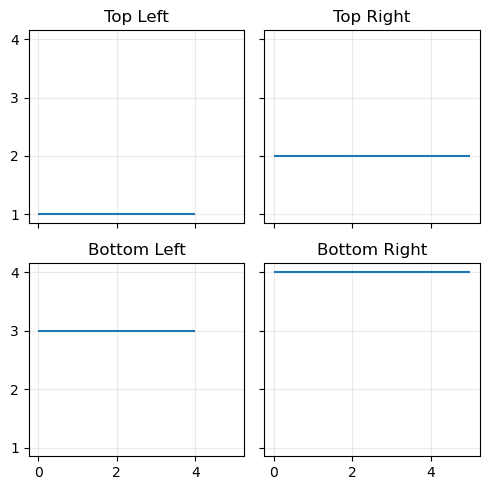

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex= True, sharey= True)

#Specifies whether the x-axis or y-axis should be shared among subplots. 
#When set to 'col', it means that all subplots within the same column share the same x-axis (for sharex) or y-axis (for sharey).
#When set to 'row', it means that all subplots within the same rows share the same x-axis (for sharex) or y-axis (for sharey). 
#This can be set to True or False as well to standardize axis over all 4 subplots


# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# the flatten() method is used to flatten the 2D array of axes objects (ax) into a 1D array. 
#Each element in the resulting 1D array corresponds to one subplot.

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten(): #for item in ax.flatten arraw (top_left, top_right, bottom_left, bottom_right = ax.flatten()), change transparency to 0.25
    a.grid(alpha=.25)

plt.tight_layout()


## 5.1 Sharing axes

## 5.2 Accessing all axes

# 6 Other useful plots

## 6.1 Histograms

### Data

In [ ]:

# Your code here


### A quick helper function

In [ ]:

# Your code here


### The histogram

In [81]:
def get_plot_data():

    data = {} #empty dictionary
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) #creating a key "All"

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1) #creating a key "NUS"
    
    return data

In [82]:
get_plot_data()

{'All': array([3701., 2850., 3053., ..., 3856., 3303., 3245.]),
 'NUS': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
        3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
        3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
        2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
        3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
        4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
        3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
        2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
        2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
        2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
        3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
        2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
        3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381., 3470.,
      

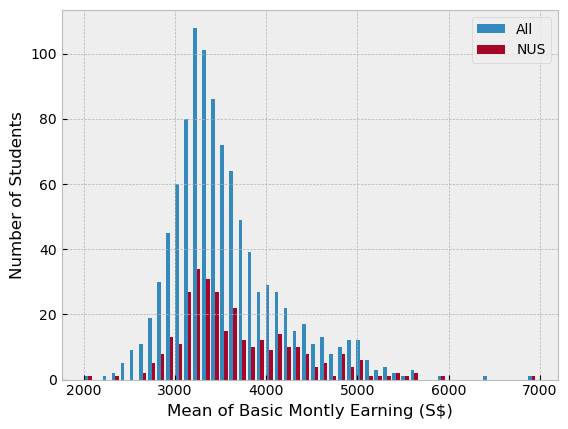

In [86]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins / intervals to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

In [87]:
#recall

d = {'a':1, 'b': 2}
d.items()

dict_items([('a', 1), ('b', 2)])

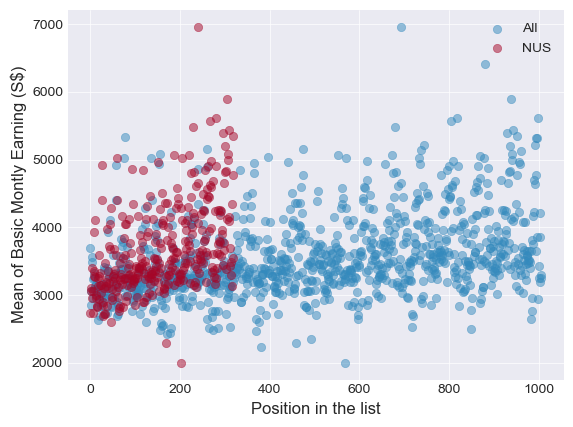

In [92]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items(): #label = key = ALL, NUS. #numbers = value = array[3701., 2850., 3053., ...,]
    x = range(len(numbers)) #length of array,from 0 to last element in array
    #print(x)
    y = numbers #corresponding value
    #print(y)
    plt.scatter(x, y, label=label, alpha=.5) #E.G if x is 1, y will be the first element in the array
                                             #kinda dumb for this scenario since we technically only have 1 variable.#GEA1000 NOISES
plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Earning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

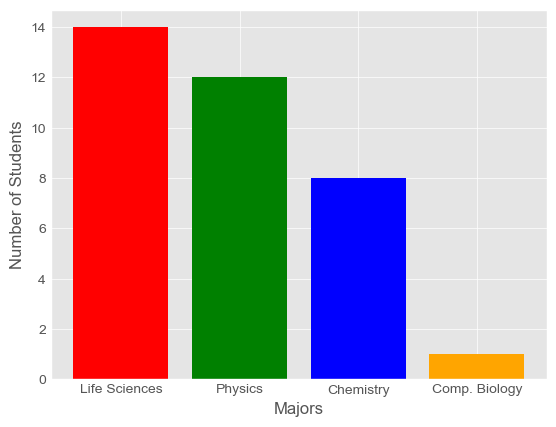

In [101]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())
colour = ["red", "green","blue","orange"]

plt.style.use('ggplot')
plt.bar(majors, numbers, color=colour)
plt.xlabel('Majors')
plt.ylabel('Number of Students')


## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

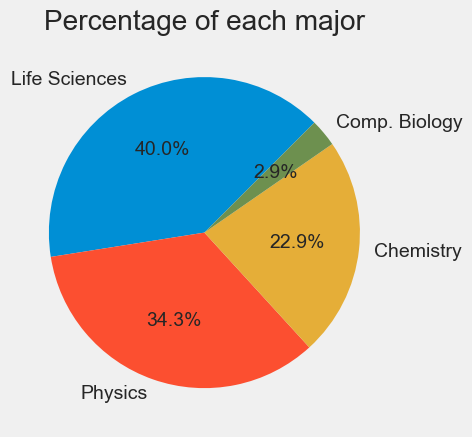

In [105]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle= 45       # the angle at which the first slice of the pie chart starts
        )
plt.title('Percentage of each major')